# 第6章 逻辑斯谛回归与最大熵模型
## 6.1 预备知识（逻辑斯谛回归）
逻辑斯谛回归模型<b>假定随机变量X的数据分布符合逻辑斯谛回归</b>,有:  
>逻辑斯谛回归分布函数：
$$F(x)=P(X \leq x)=\frac{1}{1+e^\left(-\frac{x-\mu}{\gamma}\right)}$$

>密度函数：
$$f(x)=F'(x)=\frac{e^\left(-\frac{x-\mu}{\gamma}\right)}{\gamma(1+e^\left(-\frac{x-\mu}{\gamma}\right))^2}$$

---


## 6.2 二项逻辑斯谛回归模型
抛开上述关于逻辑斯谛回归的预备知识，这里给出二项逻辑斯谛回归模型的<b>定义</b>：
><b>给定模型参数$w$和一个样本$x$，逻辑斯谛逻辑回归模型</b>
$$P(Y=1|x) = \frac{e^\left(wx+b\right)}{1+e^\left(wx+b\right)}$$  
$$P(Y=0|x) = \frac{1}{1+e^\left(wx+b\right)}$$

其中，$Y \in \{0,1\}$为二分类的类别标签空间，$x$是数据的一条样本记录，通过上述的两个式子得到的结果就是在给定了$x$的情况下，分别得到类别标签为$0$和$1$的概率值，所以，有心的读者可以发现，这个思维和朴素贝叶斯的思路很像，都是通过给定样本$x$得到不同类别标签的概率值，并选择类别概率值最大的类别作为预测类别。那~ 我们为了得到参数$w$和$b$（实际可以理解为只需要求解$w$，如下式），需要做哪些工作呢？
>$$P(Y=1|x) = \frac{e^\left(wx\right)}{1+e^\left(wx\right)}$$  
$$P(Y=0|x) = \frac{1}{1+e^\left(wx\right)}$$

---


## 6.3 求解逻辑斯谛回归的参数$w$
### 6.3.1 转化问题为似然函数求解问题
根据6.2中的式子可以得知
$$P(Y=1|x) = \frac{e^\left(wx\right)}{1+e^\left(wx\right)}$$
$$ = 1 - P(Y=0|x)$$

令
$$P(Y=1|x) = \pi(x)$$

则有
$$P(Y=0|x) = 1- \pi(x)$$

(其中，$\pi(x)$是由参数$w$决定的函数)
$$\pi(x) = \frac{e^\left(wx\right)}{1+e^\left(wx\right)} $$
>(1)此时可以直接使用似然函数求解得到$w$的值，其中，作为补充，这里给出似然函数的表达，即有：
$$L(w) = \prod_{i=1}^N[\pi(x_i)]^{y_i} [1-\pi(x_i)]^{1-y_i}$$
(2)写出对数似然函数
$$\log(L(w)) = \sum_{i=1}^N[y_i \log \pi(x_i) + (1-y_i) \log(1-\pi(x_i))]$$
(3)此时我们的目的，是求解<b>最大化</b>$L(w)$时的$w$值,即
$$w^* = \arg\underset{w}{\max} (\log(L(w))$$

那，如何求解最大化对数函数的参数值呢？处理这种高维度参数的问题，实际上都是使用凸优化的通用的通法（梯度下降或者拟牛顿法来求解极值）了，所以这里使用梯度下降方法来求解参数$w$。

### 6.3.2 求解似然函数极值
使用<b>梯度下降方法</b>（这里是梯度上升）求解极（大）值
>结合之前在感知机模型中关于梯度下降方法的描述，这里首先对$L(w)$求解关于$w$的偏导数，即有
$$\nabla_w L(w)
= \nabla_w (\sum_{i=1}^N[y_i \log \pi(x_i) + (1-y_i) \log(1-\pi(x_i))])$$
$$= \sum_{i=1}^N(\frac{y_i}{\pi(x_i)} - (1-y_i) \frac{1}{1-\pi(x_i)}) \nabla_w (\pi(x_i))$$
其中
$$\nabla_w (\pi(x_i))= \frac{(1 + e^{w x_i}) e^{w x_i} x_i - e^{wx_i}e^{wx_i}x_i}{(1+e^{wx})^2} = x_i \pi(x_i) (1-\pi(x_i))$$
上式变为
$$= \sum_{i=1}^N (\frac{y_i}{\pi(x_i)} - (1-y_i) \frac{1}{1-\pi(x_i)}) \pi(x_i) (1-\pi(x_i)) x_i$$
化简为
$$= \sum_{i=1}^N y_i (1-\pi(x_i)) x_i - (1-y_i)\pi(x_i)x_i$$
$$= \sum_{i=1}^N (y_i- \pi(x_i))x_i$$
当给定了步长$\eta$的值时，所以每次更新参数$w$的操作为：
>$$\Delta w \leftarrow \eta \sum_{i=1}^N (y_i- \pi(x_i))x_i$$
也即有
$$w_{t+1} = w_{t} + \Delta w$$
$$ = w_{t} + \eta \sum_{i=1}^N (y_i- \frac{e^\left(w_t x_i\right)}{1+e^\left(w_t x_i\right)})x_i$$
至此，目标函数已经得到，为了求解逻辑斯谛回归的参数$w^*$。接下来将对以上的思路进行求解并编写代码实现：

---


## 6.4 如何实现
### 6.4.1 自定义数据集
>首先定义数据$X$和$Y$

<function matplotlib.pyplot.show>

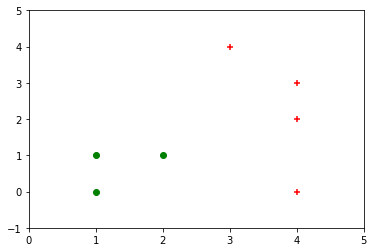

In [428]:
import numpy as np

x = np.array([[3,4],[1,1],[4,3],[1,0],[2,1],[4,2],[4,0]]) # 定义三个数据向量(8行_2列,数组)
y = np.array([1,0,1,0,0,1,1]).T # 定义类别标签(8行_1列,向量)

posindex = x[y[:] == 1] # 绘图用，标记正样本id
negindex = x[y[:] == 0] # 绘图用，标记负样本id

# 绘制散点图
import matplotlib.pyplot as plt
plt.figure(0)
plt.scatter(posindex[:,0], posindex[:,1], c='red', alpha=1, marker='+', label='pickup') 
plt.scatter(negindex[:,0], negindex[:,1], c='green', alpha=1, marker='o', label='pickup') 
plt.axis([0,5,-1,5])
plt.show

>此时我们的目标是求解参数$w$  
(注意，这里由于需要得到$wx$的值，即$w$和$x$应该可以相乘，所以，这就隐式地要求$w$的参数为两个数，需要定义为一个包含两个参数值得参数向量：$w = (w_1,w_2)$)。但是这里我们这样设置也不合理，因为在上面我们已经将$wx+b$变相处理为了$wx$，所以这里统一对输入的X添加一个纵列，即$np.ones(len(X))$，即$wx = w_0x_0+w_1x_1+w_2x_2$，因为$x_0$都是1，所以可以理解为$wx = w_0+w_1x_1+w_2x_2$，这样$w_0$就相当于参数$b$了。

### 6.4.2 编写损失计算函数、梯度上升求解w的函数、预测函数

In [429]:
# 计算损失
def calLoss(w,X,Y):
    return np.sum((np.exp(np.dot(w,X.T))/(np.exp(np.dot(w,X.T)) + 1) - Y)**2)/2

# 预测，带入式子π(x)，得到y_，若y_大于0.5，则预测y为1，否则为0
def predict(w,X):
    result = []
    X = np.column_stack([np.ones(len(X)),X])
    y_ = np.exp(np.dot(w,X.T))/(np.exp(np.dot(w,X.T)) + 1.0)
    y = y_
    y[y>0.5] = 1  
    y[y<=0.5] = 0
    return y

# 梯度上升算法求解最大化似然函数的时候的参数w
def gradAscent(X,Y,eta,iter):
    row, col = X.shape
    X = np.column_stack([np.ones(len(x)),X])
    w = np.ones((1,col + 1))
    for i in range(iter):
        ## 以下三步更新参数w
        grad = np.dot((Y - np.exp(np.dot(w,X.T))/(1 + np.exp(np.dot(w,X.T)))),X) # step 1 
        delta = eta * grad # step 2
        w = w + delta # step 3
        if i%10 == 0:
            print('==============================iteration'+ str(i)+'==============================')
            print 'weight:\t\t',w
            print 'Loss:\t\t', calLoss(w,X,Y)
            print 'pred labels:\t',predict(w,x)
        
        if sum(abs(predict(w,x)[0].flatten() - y)) == 0:
            print('=============================end at iter:'+ str(i)+'=============================')
            print 'weight:\t\t',w
            print 'Loss:\t\t', calLoss(w,X,Y)
            print 'pred labels:\t',predict(w,x)
            break # 如果满足所有的类别标签已经预测正确，则可以直接早停并返回参数w
    return w

In [430]:
w = gradAscent(x,y,0.06,200)
r = predict(w,x)

==============================iteration0==============================
weight:		[[0.83157338 0.77412186 0.8841749 ]]
Loss:		1.2371932361860227
pred labels:	[[1. 1. 1. 1. 1. 1. 1.]]
==============================iteration10==============================
weight:		[[-0.14660199  0.21201419  0.410074  ]]
Loss:		0.6294973683904217
pred labels:	[[1. 1. 1. 1. 1. 1. 1.]]
==============================iteration20==============================
weight:		[[-0.7379793   0.42948221  0.36742371]]
Loss:		0.4760452571202963
pred labels:	[[1. 1. 1. 0. 1. 1. 1.]]
==============================iteration30==============================
weight:		[[-1.24504627  0.60460239  0.36114593]]
Loss:		0.3687044061969869
pred labels:	[[1. 0. 1. 0. 1. 1. 1.]]
==============================iteration40==============================
weight:		[[-1.68210559  0.75101819  0.3684553 ]]
Loss:		0.29381420364059524
pred labels:	[[1. 0. 1. 0. 1. 1. 1.]]
==============================iteration50==============================
weight